### Trade Call Prediction using Classification

In [174]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sn
from sklearn.metrics import accuracy_score 


TASK 4.1


In [126]:

data=pd.read_csv("C:\\Users\\anjit\\Desktop\\New folder\\CL\\bajaj.csv")

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 19 columns):
Date                  495 non-null object
Symbol                495 non-null object
Series                495 non-null object
Prev Close            495 non-null float64
Open                  495 non-null float64
High                  495 non-null float64
Low                   495 non-null float64
Last                  495 non-null float64
Close                 495 non-null float64
VWAP                  495 non-null float64
Volume                495 non-null int64
Turnover              495 non-null float64
Trades                495 non-null int64
Deliverable Volume    495 non-null int64
%Deliverble           495 non-null float64
MA14                  482 non-null float64
14dSTD                482 non-null float64
Upper                 482 non-null float64
Lower                 482 non-null float64
dtypes: float64(13), int64(3), object(3)
memory usage: 73.6+ KB


In [128]:
data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,MA14,14dSTD,Upper,Lower
0,2015-01-01,BAJAJ-AUTO,EQ,2432.45,2431.0,2458.30,2428.45,2457.75,2452.15,2446.07,72928,1.783871e+13,5234,11275,0.1546,NaN,NaN,NaN,NaN
1,2015-01-02,BAJAJ-AUTO,EQ,2452.15,2457.0,2476.40,2432.00,2446.00,2451.75,2452.07,164726,4.039197e+13,10233,58411,0.3546,NaN,NaN,NaN,NaN
2,2015-01-05,BAJAJ-AUTO,EQ,2451.75,2452.0,2481.20,2450.00,2459.00,2460.70,2465.39,118873,2.930681e+13,9881,39888,0.3356,NaN,NaN,NaN,NaN
3,2015-01-06,BAJAJ-AUTO,EQ,2460.70,2454.3,2469.90,2430.00,2445.00,2441.50,2442.89,580496,1.418089e+14,12981,475283,0.8188,NaN,NaN,NaN,NaN
4,2015-01-07,BAJAJ-AUTO,EQ,2441.50,2442.0,2475.60,2432.05,2446.00,2447.20,2452.70,189191,4.640291e+13,14913,111372,0.5887,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,2016-12-26,BAJAJ-AUTO,EQ,2618.80,2617.7,2650.00,2577.70,2609.95,2600.70,2598.90,121218,3.150338e+13,16050,56111,0.4629,2649.121429,57.922211,2764.965852,2533.277006
491,2016-12-27,BAJAJ-AUTO,EQ,2600.70,2595.0,2643.70,2570.00,2637.35,2633.80,2608.21,169834,4.429630e+13,14773,77998,0.4593,2644.460714,56.195090,2756.850894,2532.070534
492,2016-12-28,BAJAJ-AUTO,EQ,2633.80,2634.0,2654.25,2623.40,2630.00,2633.15,2643.96,275831,7.292858e+13,22042,174843,0.6339,2634.071429,40.833629,2715.738687,2552.404170
493,2016-12-29,BAJAJ-AUTO,EQ,2633.15,2625.2,2666.80,2610.75,2643.55,2651.45,2639.82,190486,5.028486e+13,15583,66066,0.3468,2629.164286,33.086579,2695.337444,2562.991128


In [129]:
data['Date']= pd.to_datetime(data['Date']) 


### Defining trade call based on bollingers band and close price

In [130]:
#function to create a new column called Call based on bollingers band and close price
def call(data):
    if data['Close']<data['Lower']:
        return 'Buy'
    if data['Close']>data['Lower'] and data['Close']<data['MA14']:
        return 'Hold Buy/Liquidate short'
    if data['Close']>data['MA14'] and data['Close']<data['Upper']:
        return 'Hold short/Liquidate Buy'
    if data['Close']>data['Upper']:
        return 'Short' 
    

In [131]:
data['Call']=data.apply(call, axis=1)

In [132]:
data.tail(n=10)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,MA14,14dSTD,Upper,Lower,Call
485,2016-12-19,BAJAJ-AUTO,EQ,2659.50,2649.00,2658.00,2633.00,2643.60,2642.10,2645.26,152159,4.024999e+13,13756,89577,0.5887,2692.021429,40.094181,2772.209791,2611.833067,Hold Buy/Liquidate short
486,2016-12-20,BAJAJ-AUTO,EQ,2642.10,2644.85,2662.30,2575.50,2599.80,2585.95,2592.14,205165,5.318164e+13,17384,99564,0.4853,2684.935714,49.145852,2783.227419,2586.644010,Buy
487,2016-12-21,BAJAJ-AUTO,EQ,2585.95,2600.10,2632.00,2579.00,2586.00,2585.25,2601.28,140989,3.667525e+13,15764,61200,0.4341,2677.103571,55.731673,2788.566918,2565.640225,Hold Buy/Liquidate short
488,2016-12-22,BAJAJ-AUTO,EQ,2585.25,2586.00,2590.00,2551.00,2576.00,2564.15,2569.88,137600,3.536161e+13,13386,68720,0.4994,2667.303571,62.759806,2792.823184,2541.783959,Hold Buy/Liquidate short
489,2016-12-23,BAJAJ-AUTO,EQ,2564.15,2565.10,2633.25,2553.80,2620.00,2618.80,2608.14,197018,5.138509e+13,20800,93220,0.4732,2658.592857,60.192166,2778.977189,2538.208525,Hold Buy/Liquidate short
490,2016-12-26,BAJAJ-AUTO,EQ,2618.80,2617.70,2650.00,2577.70,2609.95,2600.70,2598.90,121218,3.150338e+13,16050,56111,0.4629,2649.121429,57.922211,2764.965852,2533.277006,Hold Buy/Liquidate short
491,2016-12-27,BAJAJ-AUTO,EQ,2600.70,2595.00,2643.70,2570.00,2637.35,2633.80,2608.21,169834,4.429630e+13,14773,77998,0.4593,2644.460714,56.195090,2756.850894,2532.070534,Hold Buy/Liquidate short
492,2016-12-28,BAJAJ-AUTO,EQ,2633.80,2634.00,2654.25,2623.40,2630.00,2633.15,2643.96,275831,7.292858e+13,22042,174843,0.6339,2634.071429,40.833629,2715.738687,2552.404170,Hold Buy/Liquidate short
493,2016-12-29,BAJAJ-AUTO,EQ,2633.15,2625.20,2666.80,2610.75,2643.55,2651.45,2639.82,190486,5.028486e+13,15583,66066,0.3468,2629.164286,33.086579,2695.337444,2562.991128,Hold short/Liquidate Buy
494,2016-12-30,BAJAJ-AUTO,EQ,2651.45,2652.10,2666.00,2627.00,2634.00,2632.20,2643.43,130704,3.455063e+13,13674,60209,0.4607,2627.525000,32.258235,2692.041471,2563.008529,Hold short/Liquidate Buy


In [133]:
data.isnull().sum()

Date                   0
Symbol                 0
Series                 0
Prev Close             0
Open                   0
High                   0
Low                    0
Last                   0
Close                  0
VWAP                   0
Volume                 0
Turnover               0
Trades                 0
Deliverable Volume     0
%Deliverble            0
MA14                  13
14dSTD                13
Upper                 13
Lower                 13
Call                  13
dtype: int64

In [134]:
data.shape

(495, 20)

In [135]:
data.dropna(inplace=True,axis=0)

In [136]:
data.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
MA14                  0
14dSTD                0
Upper                 0
Lower                 0
Call                  0
dtype: int64

In [137]:
data.set_index('Date',inplace=True)

In [138]:
np.unique(data['Call'])

array(['Buy', 'Hold Buy/Liquidate short', 'Hold short/Liquidate Buy',
       'Short'], dtype=object)

In [139]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['Cat_cal'] = labelencoder.fit_transform(data["Call"])


In [141]:
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,MA14,14dSTD,Upper,Lower,Call,Cat_cal
Date,,,,,,,,,,,,,,,,,,,,
2015-01-20,BAJAJ-AUTO,EQ,2403.90,2407.00,2417.60,2375.25,2396.3,2404.25,2399.22,197434,4.736875e+13,17433,93043,0.4713,2410.525000,45.420259,2501.365517,2319.684483,Hold Buy/Liquidate short,1
2015-01-21,BAJAJ-AUTO,EQ,2404.25,2420.00,2456.50,2399.45,2454.0,2446.65,2434.61,201858,4.914458e+13,12148,92385,0.4577,2410.132143,45.054850,2500.241842,2320.022444,Hold short/Liquidate Buy,2
2015-01-22,BAJAJ-AUTO,EQ,2446.65,2455.25,2491.25,2438.10,2444.8,2444.30,2453.53,748394,1.836210e+14,18367,613481,0.8197,2409.600000,44.566843,2498.733685,2320.466315,Hold short/Liquidate Buy,2
2015-01-23,BAJAJ-AUTO,EQ,2444.30,2470.90,2474.00,2420.00,2437.8,2441.50,2445.30,356732,8.723174e+13,22736,220716,0.6187,2408.228571,43.146186,2494.520943,2321.936200,Hold short/Liquidate Buy,2
2015-01-27,BAJAJ-AUTO,EQ,2441.50,2428.20,2439.95,2387.25,2418.0,2419.85,2405.16,507659,1.221003e+14,32083,337425,0.6647,2406.682143,42.240432,2491.163006,2322.201279,Hold short/Liquidate Buy,2


In [142]:
data["Cat_cal"].unique()

array([1, 2, 0, 3], dtype=int64)

In [143]:
data["Call"].unique()

array(['Hold Buy/Liquidate short', 'Hold short/Liquidate Buy', 'Buy',
       'Short'], dtype=object)

In [144]:
datac=data.copy()

In [145]:
datac.drop(['Symbol','Series','Call','Prev Close','Open','High','Low','Last','VWAP','Volume','Turnover','Trades','Deliverable Volume','%Deliverble','14dSTD'],axis=1,inplace=True)

In [146]:
datac.head()

,Close,MA14,Upper,Lower,Cat_cal
Date,,,,,
2015-01-20,2404.25,2410.525000,2501.365517,2319.684483,1
2015-01-21,2446.65,2410.132143,2500.241842,2320.022444,2
2015-01-22,2444.30,2409.600000,2498.733685,2320.466315,2
2015-01-23,2441.50,2408.228571,2494.520943,2321.936200,2
2015-01-27,2419.85,2406.682143,2491.163006,2322.201279,2


In [147]:
y=datac.iloc[:,4:]

In [148]:
y

,Cat_cal
Date,
2015-01-20,1
2015-01-21,2
2015-01-22,2
2015-01-23,2
2015-01-27,2
...,...
2016-12-26,1
2016-12-27,1
2016-12-28,1


In [149]:
X=datac.drop('Cat_cal',axis=1)

In [150]:
X.head()

,Close,MA14,Upper,Lower
Date,,,,
2015-01-20,2404.25,2410.525000,2501.365517,2319.684483
2015-01-21,2446.65,2410.132143,2500.241842,2320.022444
2015-01-22,2444.30,2409.600000,2498.733685,2320.466315
2015-01-23,2441.50,2408.228571,2494.520943,2321.936200
2015-01-27,2419.85,2406.682143,2491.163006,2322.201279


### Taining the classification model  with bollingers columns and stock price as input and call as output

In [151]:
X = np.matrix(X)
y = np.matrix(y)

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [153]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)


#### Logistic regression

In [157]:
logReg=LogisticRegression()#object for logistic regression

In [158]:
logReg.fit(X_train,y_train)

C:\Users\anjit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anjit\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [159]:
logReg.score(X_train,y_train), logReg.score(X_test,y_test)


(0.9948051948051948, 0.9896907216494846)

#### XGBClassifier

In [163]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective='multi:softprob',num_class=4)
xgb.fit(X_train, y_train)
xgb.score(X_train,y_train), xgb.score(X_test,y_test)


C:\Users\anjit\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anjit\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.9662337662337662, 0.7731958762886598)

#### RandomForestClassifier

In [164]:
from sklearn.ensemble import RandomForestClassifier#Random forest 
rf=RandomForestClassifier(n_estimators = 10, criterion = 'gini', random_state = 42)
rf.fit(X_train,y_train)
rf.score(X_train,y_train), rf.score(X_test,y_test)


C:\Users\anjit\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


(0.9896103896103896, 0.8247422680412371)

#### GradientBoostingClassifier

In [166]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(learning_rate=0.1,n_estimators=300)
gbc.fit(X_train,y_train)
gbc.score(X_train,y_train), gbc.score(X_test,y_test)

C:\Users\anjit\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(1.0, 0.7731958762886598)

In [171]:
y_pred=logReg.predict(X_test)

### Accuracy of predictions using logistic regressiom

In [177]:
accuracy_score(y_test,y_pred)

0.9896907216494846

In [178]:
from sklearn import metrics


### confusion matrix for logistic regression 

In [179]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 6,  0,  0,  0],
       [ 0, 46,  0,  0],
       [ 0,  0, 42,  1],
       [ 0,  0,  0,  2]], dtype=int64)

### Predicting daily call for a new stock with the already trained logistic regression model

In [180]:
from nsepy import get_history
from datetime import date


In [181]:
maruti =get_history(symbol='MARUTI',
                   start=date(2015,1,1),
                   end=date(2016,12,31))

In [182]:
maruti

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,MARUTI,EQ,3329.80,3320.25,3360.00,3320.25,3342.00,3340.75,3345.04,299232,1.000942e+14,10315,140596,0.4699
2015-01-02,MARUTI,EQ,3340.75,3360.00,3383.00,3350.50,3360.00,3359.60,3365.71,233924,7.873206e+13,10656,108279,0.4629
2015-01-05,MARUTI,EQ,3359.60,3382.00,3469.35,3376.05,3448.00,3447.80,3446.39,536747,1.849841e+14,29571,256277,0.4775
2015-01-06,MARUTI,EQ,3447.80,3439.00,3439.00,3382.50,3393.90,3395.25,3408.41,422743,1.440883e+14,20162,193779,0.4584
2015-01-07,MARUTI,EQ,3395.25,3400.00,3458.95,3382.05,3449.70,3437.75,3419.57,369241,1.262644e+14,19251,133255,0.3609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-26,MARUTI,EQ,5197.15,5179.00,5257.80,5151.10,5174.00,5167.35,5192.70,510998,2.653458e+14,50261,161600,0.3162
2016-12-27,MARUTI,EQ,5167.35,5185.00,5237.40,5117.20,5217.00,5224.00,5184.75,486703,2.523432e+14,41274,143277,0.2944
2016-12-28,MARUTI,EQ,5224.00,5250.00,5278.00,5219.45,5239.95,5231.25,5246.94,595514,3.124627e+14,46855,285107,0.4788


In [183]:
maruti['MA14'] = maruti['Close'].rolling(window=14).mean()
maruti['14dSTD'] = maruti['Close'].rolling(window=14).std() 

maruti['Upper'] = maruti['MA14'] + (maruti['14dSTD'] * 2)
maruti['Lower'] = maruti['MA14'] - (maruti['14dSTD'] * 2)

In [184]:
maruti

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,MA14,14dSTD,Upper,Lower
Date,,,,,,,,,,,,,,,,,,
2015-01-01,MARUTI,EQ,3329.80,3320.25,3360.00,3320.25,3342.00,3340.75,3345.04,299232,1.000942e+14,10315,140596,0.4699,NaN,NaN,NaN,NaN
2015-01-02,MARUTI,EQ,3340.75,3360.00,3383.00,3350.50,3360.00,3359.60,3365.71,233924,7.873206e+13,10656,108279,0.4629,NaN,NaN,NaN,NaN
2015-01-05,MARUTI,EQ,3359.60,3382.00,3469.35,3376.05,3448.00,3447.80,3446.39,536747,1.849841e+14,29571,256277,0.4775,NaN,NaN,NaN,NaN
2015-01-06,MARUTI,EQ,3447.80,3439.00,3439.00,3382.50,3393.90,3395.25,3408.41,422743,1.440883e+14,20162,193779,0.4584,NaN,NaN,NaN,NaN
2015-01-07,MARUTI,EQ,3395.25,3400.00,3458.95,3382.05,3449.70,3437.75,3419.57,369241,1.262644e+14,19251,133255,0.3609,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-26,MARUTI,EQ,5197.15,5179.00,5257.80,5151.10,5174.00,5167.35,5192.70,510998,2.653458e+14,50261,161600,0.3162,5156.096429,45.333883,5246.764195,5065.428663
2016-12-27,MARUTI,EQ,5167.35,5185.00,5237.40,5117.20,5217.00,5224.00,5184.75,486703,2.523432e+14,41274,143277,0.2944,5163.764286,47.189326,5258.142937,5069.385634
2016-12-28,MARUTI,EQ,5224.00,5250.00,5278.00,5219.45,5239.95,5231.25,5246.94,595514,3.124627e+14,46855,285107,0.4788,5163.525000,46.809470,5257.143939,5069.906061


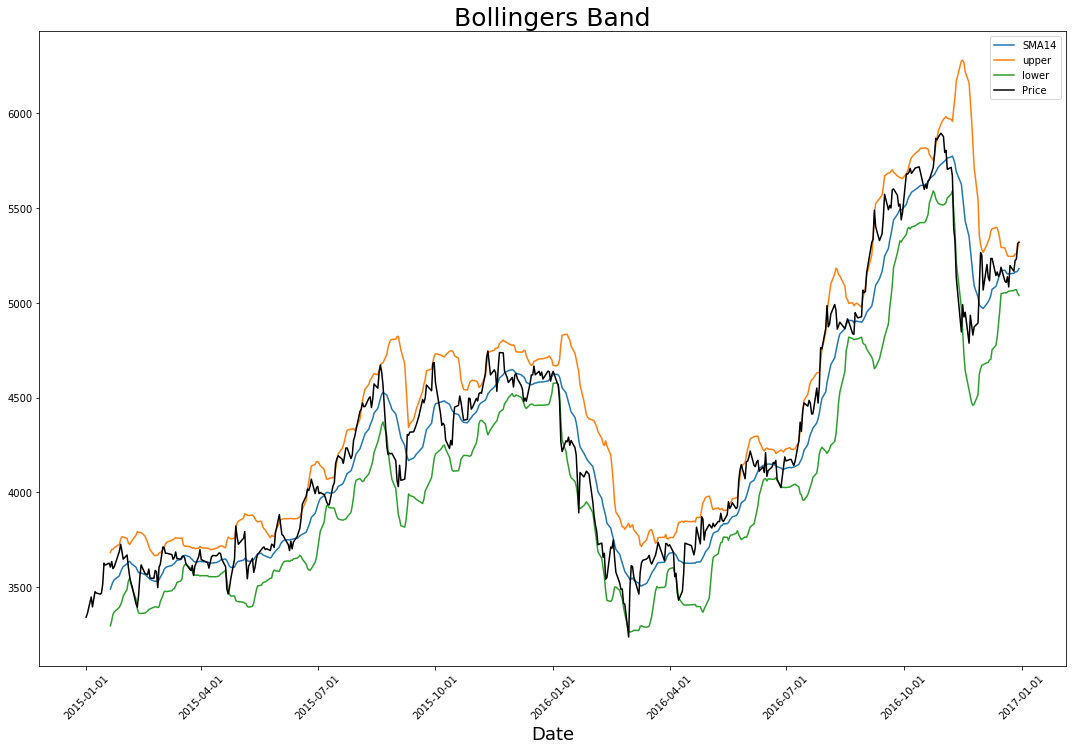

In [185]:
fig, ax = plt.subplots(figsize=(15, 10))

plt.plot(maruti['MA14'],label='SMA14')
plt.plot(maruti['Upper'],label='upper')
plt.plot(maruti['Lower'],label='lower')
plt.plot(maruti['Close'],label='Price',color='black')

plt.legend(loc=1)
ax.set_xlabel("Date",size=18)
ax.set_title('Bollingers Band',size=25)
plt.tight_layout()
plt.xticks(plt.xticks()[0], rotation=45)

plt.show()

In [186]:
maruti.to_csv('C:\\Users\\anjit\\Desktop\\New folder\\CL\\maruti.csv')

In [187]:
data1=pd.read_csv("C:\\Users\\anjit\\Desktop\\New folder\\CL\\maruti.csv")

In [188]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 19 columns):
Date                  495 non-null object
Symbol                495 non-null object
Series                495 non-null object
Prev Close            495 non-null float64
Open                  495 non-null float64
High                  495 non-null float64
Low                   495 non-null float64
Last                  495 non-null float64
Close                 495 non-null float64
VWAP                  495 non-null float64
Volume                495 non-null int64
Turnover              495 non-null float64
Trades                495 non-null int64
Deliverable Volume    495 non-null int64
%Deliverble           495 non-null float64
MA14                  482 non-null float64
14dSTD                482 non-null float64
Upper                 482 non-null float64
Lower                 482 non-null float64
dtypes: float64(13), int64(3), object(3)
memory usage: 73.6+ KB


In [189]:
data1['Date']= pd.to_datetime(data1['Date']) 


In [190]:
data1

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,MA14,14dSTD,Upper,Lower
0,2015-01-01,MARUTI,EQ,3329.80,3320.25,3360.00,3320.25,3342.00,3340.75,3345.04,299232,1.000942e+14,10315,140596,0.4699,NaN,NaN,NaN,NaN
1,2015-01-02,MARUTI,EQ,3340.75,3360.00,3383.00,3350.50,3360.00,3359.60,3365.71,233924,7.873206e+13,10656,108279,0.4629,NaN,NaN,NaN,NaN
2,2015-01-05,MARUTI,EQ,3359.60,3382.00,3469.35,3376.05,3448.00,3447.80,3446.39,536747,1.849841e+14,29571,256277,0.4775,NaN,NaN,NaN,NaN
3,2015-01-06,MARUTI,EQ,3447.80,3439.00,3439.00,3382.50,3393.90,3395.25,3408.41,422743,1.440883e+14,20162,193779,0.4584,NaN,NaN,NaN,NaN
4,2015-01-07,MARUTI,EQ,3395.25,3400.00,3458.95,3382.05,3449.70,3437.75,3419.57,369241,1.262644e+14,19251,133255,0.3609,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,2016-12-26,MARUTI,EQ,5197.15,5179.00,5257.80,5151.10,5174.00,5167.35,5192.70,510998,2.653458e+14,50261,161600,0.3162,5156.096429,45.333883,5246.764195,5065.428663
491,2016-12-27,MARUTI,EQ,5167.35,5185.00,5237.40,5117.20,5217.00,5224.00,5184.75,486703,2.523432e+14,41274,143277,0.2944,5163.764286,47.189326,5258.142937,5069.385634
492,2016-12-28,MARUTI,EQ,5224.00,5250.00,5278.00,5219.45,5239.95,5231.25,5246.94,595514,3.124627e+14,46855,285107,0.4788,5163.525000,46.809470,5257.143939,5069.906061
493,2016-12-29,MARUTI,EQ,5231.25,5217.20,5349.00,5217.20,5345.50,5314.80,5284.21,655325,3.462875e+14,56686,311207,0.4749,5169.225000,59.358904,5287.942809,5050.507191


In [191]:
data1.dropna(inplace=True,axis=0)

In [192]:
data1.set_index('Date',inplace=True)

In [193]:
data1.drop(['Symbol','Series','Prev Close','Open','High','Low','Last','VWAP','Volume','Turnover','Trades','Deliverable Volume','%Deliverble','14dSTD'],axis=1,inplace=True)

In [194]:
data1

,Close,MA14,Upper,Lower
Date,,,,
2015-01-20,3605.55,3489.014286,3682.531220,3295.497352
2015-01-21,3634.70,3510.010714,3697.937657,3322.083772
2015-01-22,3597.25,3526.985714,3698.613166,3355.358263
2015-01-23,3606.70,3538.335714,3708.414806,3368.256622
2015-01-27,3687.90,3559.239286,3725.455957,3393.022614
...,...,...,...,...
2016-12-26,5167.35,5156.096429,5246.764195,5065.428663
2016-12-27,5224.00,5163.764286,5258.142937,5069.385634
2016-12-28,5231.25,5163.525000,5257.143939,5069.906061


In [195]:
X1 = np.matrix(data1)


In [196]:
X1

matrix([[3605.55      , 3489.01428571, 3682.53121969, 3295.49735174],
        [3634.7       , 3510.01071429, 3697.93765663, 3322.08377194],
        [3597.25      , 3526.98571429, 3698.61316605, 3355.35826253],
        ...,
        [5231.25      , 5163.525     , 5257.14393916, 5069.90606084],
        [5314.8       , 5169.225     , 5287.94280859, 5050.50719141],
        [5319.55      , 5181.73571429, 5323.80320328, 5039.66822529]])

### Predicting daily trade calls using already trained Logistic Regression Model

In [201]:
Xmp=logReg.predict(X1)

In [202]:
Xmp

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0,
       1, 0, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 1, 2, 3,
       2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 0, 1, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0,

In [203]:
xmp=list(Xmp)

In [204]:
data1['Call']=xmp#adding the predicted daily calls to the dataframe

In [205]:
data1.head()

,Close,MA14,Upper,Lower,Call
Date,,,,,
2015-01-20,3605.55,3489.014286,3682.531220,3295.497352,2
2015-01-21,3634.70,3510.010714,3697.937657,3322.083772,2
2015-01-22,3597.25,3526.985714,3698.613166,3355.358263,2
2015-01-23,3606.70,3538.335714,3708.414806,3368.256622,2
2015-01-27,3687.90,3559.239286,3725.455957,3393.022614,2


In [206]:
def call_name(df):
    if df['Call']==1:
        df['call_name']='Hold Buy/Liquidate short'
    if df['Call']==2:
        df['call_name']='Hold short/Liquidate Buy'
    if df['Call']==0:
        df['call_name']='Buy'
    if df['Call']==3:
        df['call_name']='Short'
    return(df)

In [207]:
data1=data1.apply(call_name,axis=1)

In [208]:
data1

,Close,MA14,Upper,Lower,Call,call_name
Date,,,,,,
2015-01-20,3605.55,3489.014286,3682.531220,3295.497352,2.0,Hold short/Liquidate Buy
2015-01-21,3634.70,3510.010714,3697.937657,3322.083772,2.0,Hold short/Liquidate Buy
2015-01-22,3597.25,3526.985714,3698.613166,3355.358263,2.0,Hold short/Liquidate Buy
2015-01-23,3606.70,3538.335714,3708.414806,3368.256622,2.0,Hold short/Liquidate Buy
2015-01-27,3687.90,3559.239286,3725.455957,3393.022614,2.0,Hold short/Liquidate Buy
...,...,...,...,...,...,...
2016-12-26,5167.35,5156.096429,5246.764195,5065.428663,2.0,Hold short/Liquidate Buy
2016-12-27,5224.00,5163.764286,5258.142937,5069.385634,2.0,Hold short/Liquidate Buy
2016-12-28,5231.25,5163.525000,5257.143939,5069.906061,2.0,Hold short/Liquidate Buy


### Trade call prediction using Moving Average

TASK 4.2

In [274]:
reliance = get_history(symbol='RELIANCE',
                   start=date(2017,1,1),
    
                   end=date(2020,11,30))


In [275]:
reliance

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2017-01-02,RELIANCE,EQ,1082.40,1084.00,1090.00,1072.35,1086.70,1085.10,1086.63,1622458,1.763016e+14,38903,881915,0.5436
2017-01-03,RELIANCE,EQ,1085.10,1089.85,1097.00,1081.10,1089.00,1089.40,1091.74,1470751,1.605682e+14,31291,776985,0.5283
2017-01-04,RELIANCE,EQ,1089.40,1092.90,1093.00,1064.30,1067.15,1067.15,1072.39,2375547,2.547514e+14,70540,1516724,0.6385
2017-01-05,RELIANCE,EQ,1067.15,1071.00,1079.90,1068.75,1077.00,1077.40,1077.12,1996483,2.150452e+14,84058,1272212,0.6372
2017-01-06,RELIANCE,EQ,1077.40,1074.20,1085.00,1073.10,1073.95,1074.95,1078.77,1793427,1.934704e+14,66643,1121595,0.6254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-23,RELIANCE,EQ,1899.50,1951.00,1970.00,1926.25,1955.20,1950.70,1952.18,20918665,4.083704e+15,497781,5148955,0.2461
2020-11-24,RELIANCE,EQ,1950.70,1964.00,1974.00,1932.00,1971.05,1964.05,1952.11,14277083,2.787044e+15,362587,3213843,0.2251
2020-11-25,RELIANCE,EQ,1964.05,1980.00,1992.95,1942.20,1947.50,1947.80,1969.06,15062376,2.965874e+15,356793,3040444,0.2019


In [276]:
reliance.shape[0]

969

In [277]:
reliance['percent_change'] = reliance['Close'].pct_change()
reliance['%O_C']=(reliance['Close']-reliance['Open'])/reliance['Close']*100 
reliance['%H_L']=(reliance['High']-reliance['Low'])/reliance['High']*100 


In [278]:
reliance

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,percent_change,%O_C,%H_L
Date,,,,,,,,,,,,,,,,,
2017-01-02,RELIANCE,EQ,1082.40,1084.00,1090.00,1072.35,1086.70,1085.10,1086.63,1622458,1.763016e+14,38903,881915,0.5436,NaN,0.101373,1.619266
2017-01-03,RELIANCE,EQ,1085.10,1089.85,1097.00,1081.10,1089.00,1089.40,1091.74,1470751,1.605682e+14,31291,776985,0.5283,0.003963,-0.041307,1.449407
2017-01-04,RELIANCE,EQ,1089.40,1092.90,1093.00,1064.30,1067.15,1067.15,1072.39,2375547,2.547514e+14,70540,1516724,0.6385,-0.020424,-2.412969,2.625801
2017-01-05,RELIANCE,EQ,1067.15,1071.00,1079.90,1068.75,1077.00,1077.40,1077.12,1996483,2.150452e+14,84058,1272212,0.6372,0.009605,0.594023,1.032503
2017-01-06,RELIANCE,EQ,1077.40,1074.20,1085.00,1073.10,1073.95,1074.95,1078.77,1793427,1.934704e+14,66643,1121595,0.6254,-0.002274,0.069771,1.096774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-23,RELIANCE,EQ,1899.50,1951.00,1970.00,1926.25,1955.20,1950.70,1952.18,20918665,4.083704e+15,497781,5148955,0.2461,0.026954,-0.015379,2.220812
2020-11-24,RELIANCE,EQ,1950.70,1964.00,1974.00,1932.00,1971.05,1964.05,1952.11,14277083,2.787044e+15,362587,3213843,0.2251,0.006844,0.002546,2.127660
2020-11-25,RELIANCE,EQ,1964.05,1980.00,1992.95,1942.20,1947.50,1947.80,1969.06,15062376,2.965874e+15,356793,3040444,0.2019,-0.008274,-1.653147,2.546476


In [281]:
reliance['MA5'] = reliance['Close'].rolling(window=5).mean()
reliance['5dSTD'] = reliance['Close'].rolling(window=5).std() 


In [282]:
reliance.head(18)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,percent_change,%O_C,%H_L,MA5,5dSTD
Date,,,,,,,,,,,,,,,,,,,
2017-01-02,RELIANCE,EQ,1082.40,1084.00,1090.00,1072.35,1086.70,1085.10,1086.63,1622458,1.763016e+14,38903,881915,0.5436,NaN,0.101373,1.619266,NaN,NaN
2017-01-03,RELIANCE,EQ,1085.10,1089.85,1097.00,1081.10,1089.00,1089.40,1091.74,1470751,1.605682e+14,31291,776985,0.5283,0.003963,-0.041307,1.449407,NaN,NaN
2017-01-04,RELIANCE,EQ,1089.40,1092.90,1093.00,1064.30,1067.15,1067.15,1072.39,2375547,2.547514e+14,70540,1516724,0.6385,-0.020424,-2.412969,2.625801,NaN,NaN
2017-01-05,RELIANCE,EQ,1067.15,1071.00,1079.90,1068.75,1077.00,1077.40,1077.12,1996483,2.150452e+14,84058,1272212,0.6372,0.009605,0.594023,1.032503,NaN,NaN
2017-01-06,RELIANCE,EQ,1077.40,1074.20,1085.00,1073.10,1073.95,1074.95,1078.77,1793427,1.934704e+14,66643,1121595,0.6254,-0.002274,0.069771,1.096774,1078.80,8.725752
2017-01-09,RELIANCE,EQ,1074.95,1077.00,1086.00,1071.00,1078.00,1077.70,1079.41,1195257,1.290171e+14,37309,717860,0.6006,0.002558,0.064953,1.381215,1077.32,7.986285
2017-01-10,RELIANCE,EQ,1077.70,1080.00,1094.40,1080.00,1088.00,1089.85,1089.83,2594400,2.827465e+14,76596,1854059,0.7146,0.011274,0.903794,1.315789,1077.41,8.157159
2017-01-11,RELIANCE,EQ,1089.85,1095.00,1095.70,1084.00,1084.80,1086.05,1087.58,2623211,2.852943e+14,58033,2028194,0.7732,-0.003487,-0.824087,1.067811,1081.19,6.405018
2017-01-12,RELIANCE,EQ,1086.05,1087.00,1090.35,1079.80,1080.45,1083.30,1084.63,999364,1.083938e+14,29486,499595,0.4999,-0.002532,-0.341549,0.967579,1082.37,6.066774


In [283]:
reliance['Action'] = np.where(reliance['Close'].shift(-1) > reliance['Close'],1,-1)# 1 indicates to buy,-1 indicated to sell


In [284]:
reliance

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,percent_change,%O_C,%H_L,MA5,5dSTD,Action
Date,,,,,,,,,,,,,,,,,,,,
2017-01-02,RELIANCE,EQ,1082.40,1084.00,1090.00,1072.35,1086.70,1085.10,1086.63,1622458,1.763016e+14,38903,881915,0.5436,NaN,0.101373,1.619266,NaN,NaN,1
2017-01-03,RELIANCE,EQ,1085.10,1089.85,1097.00,1081.10,1089.00,1089.40,1091.74,1470751,1.605682e+14,31291,776985,0.5283,0.003963,-0.041307,1.449407,NaN,NaN,-1
2017-01-04,RELIANCE,EQ,1089.40,1092.90,1093.00,1064.30,1067.15,1067.15,1072.39,2375547,2.547514e+14,70540,1516724,0.6385,-0.020424,-2.412969,2.625801,NaN,NaN,1
2017-01-05,RELIANCE,EQ,1067.15,1071.00,1079.90,1068.75,1077.00,1077.40,1077.12,1996483,2.150452e+14,84058,1272212,0.6372,0.009605,0.594023,1.032503,NaN,NaN,-1
2017-01-06,RELIANCE,EQ,1077.40,1074.20,1085.00,1073.10,1073.95,1074.95,1078.77,1793427,1.934704e+14,66643,1121595,0.6254,-0.002274,0.069771,1.096774,1078.80,8.725752,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-23,RELIANCE,EQ,1899.50,1951.00,1970.00,1926.25,1955.20,1950.70,1952.18,20918665,4.083704e+15,497781,5148955,0.2461,0.026954,-0.015379,2.220812,1960.76,37.954502,1
2020-11-24,RELIANCE,EQ,1950.70,1964.00,1974.00,1932.00,1971.05,1964.05,1952.11,14277083,2.787044e+15,362587,3213843,0.2251,0.006844,0.002546,2.127660,1954.92,33.715252,-1
2020-11-25,RELIANCE,EQ,1964.05,1980.00,1992.95,1942.20,1947.50,1947.80,1969.06,15062376,2.965874e+15,356793,3040444,0.2019,-0.008274,-1.653147,2.546476,1947.04,28.482876,1


In [285]:
reliance.isnull().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
percent_change        1
%O_C                  0
%H_L                  0
MA5                   4
5dSTD                 4
Action                0
dtype: int64

In [286]:
reliance.dropna(inplace=True,axis=0)

In [287]:
reliance.isnull().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
percent_change        0
%O_C                  0
%H_L                  0
MA5                   0
5dSTD                 0
Action                0
dtype: int64

In [288]:
y2=reliance.iloc[:,19:]

In [289]:
y2

,Action
Date,
2017-01-06,1
2017-01-09,1
2017-01-10,-1
2017-01-11,-1
2017-01-12,1
...,...
2020-11-23,1
2020-11-24,-1
2020-11-25,1


In [290]:
X2=reliance.iloc[:,15:19]

In [291]:
X2

,%O_C,%H_L,MA5,5dSTD
Date,,,,
2017-01-06,0.069771,1.096774,1078.80,8.725752
2017-01-09,0.064953,1.381215,1077.32,7.986285
2017-01-10,0.903794,1.315789,1077.41,8.157159
2017-01-11,-0.824087,1.067811,1081.19,6.405018
2017-01-12,-0.341549,0.967579,1082.37,6.066774
...,...,...,...,...
2020-11-23,-0.015379,2.220812,1960.76,37.954502
2020-11-24,0.002546,2.127660,1954.92,33.715252
2020-11-25,-1.653147,2.546476,1947.04,28.482876


In [292]:
reliance_length = reliance.shape[0]
split = int(reliance_length * 0.75)
split


723

In [293]:
X2 = np.matrix(X2)
y2 = np.matrix(y2)

In [294]:
X2_train, X2_test = X2[:split], X2[split:]
y2_train, y2_test = y2[:split], y2[split:]

In [295]:
print(X2_train.shape, X2_test.shape)
print(y2_train.shape, y2_test.shape)

(723, 4) (242, 4)
(723, 1) (242, 1)


In [296]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X2_train = sc_x.fit_transform(X2_train)
X2_test  = sc_x.transform(X2_test)


In [312]:
from sklearn.ensemble import RandomForestClassifier#Random forest for predicting trade call for past 3 years
rf2=RandomForestClassifier(random_state =4,n_estimators=3)
rf2.fit(X2_train,y2_train)


C:\Users\anjit\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3,
                       n_jobs=None, oob_score=False, random_state=4, verbose=0,
                       warm_start=False)

In [313]:
rf2.score(X2_train,y2_train), rf2.score(X2_test,y2_test)


(0.9045643153526971, 0.5082644628099173)

In [308]:
#parameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [3, 10, 30,50,100,200,300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state':[0,1,2,3,4,5]
}   
rnd_reg = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf2, param_grid, cv=10,scoring="neg_mean_squared_error",
                          return_train_score=True)
grid_search.fit(X2_train,y2_train)

C:\Users\anjit\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\anjit\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\anjit\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\anjit\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=3, n_jobs=None,
                                              oob_score=False, random_state=4,
                                    

In [309]:
grid_search.best_params_

{'max_features': 'auto', 'n_estimators': 3, 'random_state': 3}

In [302]:
print(rf2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3,
                       n_jobs=None, oob_score=False, random_state=4, verbose=0,
                       warm_start=False)


In [303]:
g=rf2.predict(X2_test)

In [304]:
g

array([ 1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1,
       -1,  1, -1,  1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1,
        1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1, -1,  1,
       -1, -1,  1, -1,  1,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1,
        1,  1,  1,  1, -1, -1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1,  1,
        1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1,
       -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1,
       -1, -1, -1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1,  1,
        1, -1, -1,  1, -1,  1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1,
        1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1,  1, -1,  1,  1, -1,
       -1, -1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1,  1,
        1, -1, -1,  1, -1

In [305]:
cnf_matrix = metrics.confusion_matrix(y2_test,g)
cnf_matrix

array([[59, 62],
       [57, 64]], dtype=int64)

In [306]:
from sklearn.metrics import accuracy_score
print('Correct Prediction (%): ', accuracy_score(y2_test, g, normalize=True)*100.0)

Correct Prediction (%):  50.82644628099173


In [307]:
from sklearn.metrics import classification_report
report = classification_report(y2_test,g)
print(report)

              precision    recall  f1-score   support

          -1       0.51      0.49      0.50       121
           1       0.51      0.53      0.52       121

    accuracy                           0.51       242
   macro avg       0.51      0.51      0.51       242
weighted avg       0.51      0.51      0.51       242



In [315]:
reliance['strategy_returns'] = reliance.percent_change.shift(-1)*(rf2.predict(X2).astype(float))

In [316]:
reliance

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Trades,Deliverable Volume,%Deliverble,percent_change,%O_C,%H_L,MA5,5dSTD,Action,strategy_returns
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-06,RELIANCE,EQ,1077.40,1074.20,1085.00,1073.10,1073.95,1074.95,1078.77,1793427,...,66643,1121595,0.6254,-0.002274,0.069771,1.096774,1078.80,8.725752,1,0.002558
2017-01-09,RELIANCE,EQ,1074.95,1077.00,1086.00,1071.00,1078.00,1077.70,1079.41,1195257,...,37309,717860,0.6006,0.002558,0.064953,1.381215,1077.32,7.986285,1,0.011274
2017-01-10,RELIANCE,EQ,1077.70,1080.00,1094.40,1080.00,1088.00,1089.85,1089.83,2594400,...,76596,1854059,0.7146,0.011274,0.903794,1.315789,1077.41,8.157159,-1,0.003487
2017-01-11,RELIANCE,EQ,1089.85,1095.00,1095.70,1084.00,1084.80,1086.05,1087.58,2623211,...,58033,2028194,0.7732,-0.003487,-0.824087,1.067811,1081.19,6.405018,-1,-0.002532
2017-01-12,RELIANCE,EQ,1086.05,1087.00,1090.35,1079.80,1080.45,1083.30,1084.63,999364,...,29486,499595,0.4999,-0.002532,-0.341549,0.967579,1082.37,6.066774,1,0.006554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-23,RELIANCE,EQ,1899.50,1951.00,1970.00,1926.25,1955.20,1950.70,1952.18,20918665,...,497781,5148955,0.2461,0.026954,-0.015379,2.220812,1960.76,37.954502,1,0.006844
2020-11-24,RELIANCE,EQ,1950.70,1964.00,1974.00,1932.00,1971.05,1964.05,1952.11,14277083,...,362587,3213843,0.2251,0.006844,0.002546,2.127660,1954.92,33.715252,-1,-0.008274
2020-11-25,RELIANCE,EQ,1964.05,1980.00,1992.95,1942.20,1947.50,1947.80,1969.06,15062376,...,356793,3040444,0.2019,-0.008274,-1.653147,2.546476,1947.04,28.482876,1,-0.002464


In [317]:
print (reliance.dtypes)


Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                  int64
Deliverable Volume      int64
%Deliverble           float64
percent_change        float64
%O_C                  float64
%H_L                  float64
MA5                   float64
5dSTD                 float64
Action                  int32
strategy_returns      float64
dtype: object


In [318]:
split=X2_train.shape[0]

### Daily returns histogram


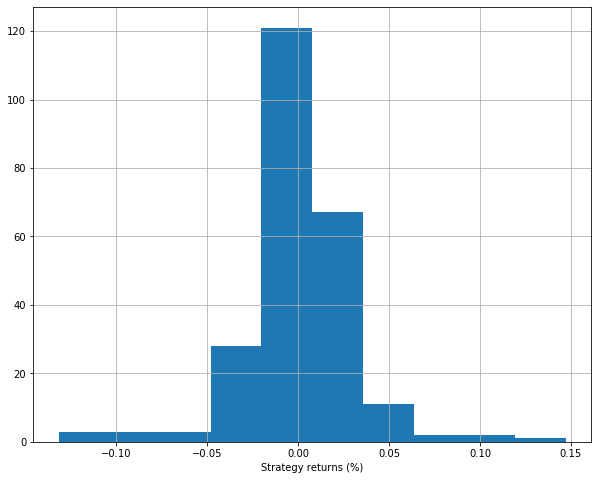

In [319]:
plt.figure(figsize=(10, 8))

reliance.strategy_returns[split:].hist()
plt.xlabel('Strategy returns (%)')
plt.show()

### Strategy Returns


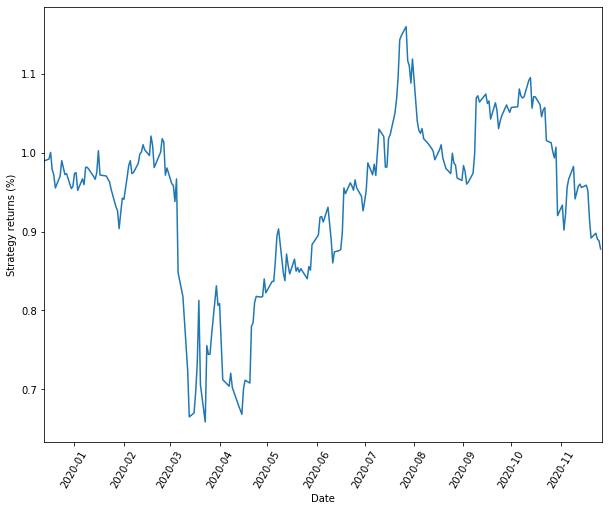

In [320]:
plt.figure(figsize=(10, 8))

(reliance.strategy_returns[split:]+1).cumprod().plot()
plt.ylabel('Strategy returns (%)')
plt.xticks(rotation=60,fontsize=10)
plt.show()